In [28]:
import os
from joblib import dump, load
import matplotlib.pyplot as plt
import pylab as plot
from scipy.stats import pearsonr
import numpy as np

from adjustText import adjust_text


from jive.AJIVE import AJIVE

from explore.BlockBlock import BlockBlock
from explore.Base import Union

from cbcs_joint.load_analysis_data import load_analysis_data
from cbcs_joint.viz_utils import savefig, mpl_noaxis
from cbcs_joint.Paths import Paths
from cbcs_joint.viz_utils import mpl_noaxis
from cbcs_joint.viz_loadings import plot_loading

In [2]:
# make directories for saved results
fig_save_dir = 'figures_resubmit/'


mpl_noaxis(labels=True)

def savefig(fpath, dpi=100):
    plt.savefig(fpath, bbox_inches='tight', frameon=False, dpi=dpi)
    
params = {'legend.fontsize': 11,
          'legend.handlelength': 2}
plot.rcParams.update(params)


In [26]:
data = load_analysis_data(load_patch_feats=False)
clinical_data = data['clinical_data']
genes = data['genes']

ajive = load(os.path.join(Paths().results_dir, 'data', 'fit_ajive'))

all_tests = load(os.path.join(Paths().results_dir, 'data', 'clinical_data_comparisions'))
# common scores vs clinical data
common_scd = all_tests.tests_['common']

in clinical, not intersection: 1807
in intersection, not clinical: 0
intersection: 1191
in images, not in genes: 522
in genes, not in images: 259
(1191, 512)
(1191, 50)


# set plotting parameters

In [5]:
params = {'legend.fontsize': 20,
          'legend.title_fontsize':15,
          'legend.handlelength': 2,
          'axes.labelsize': 15,
          'ytick.labelsize': 12,
          'xtick.labelsize': 12}
plot.rcParams.update(params)

# loadings 

In [6]:
dpi = 300
figsize=(15, 5)

/Users/iaincarmichael/anaconda3/envs/bcia/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  


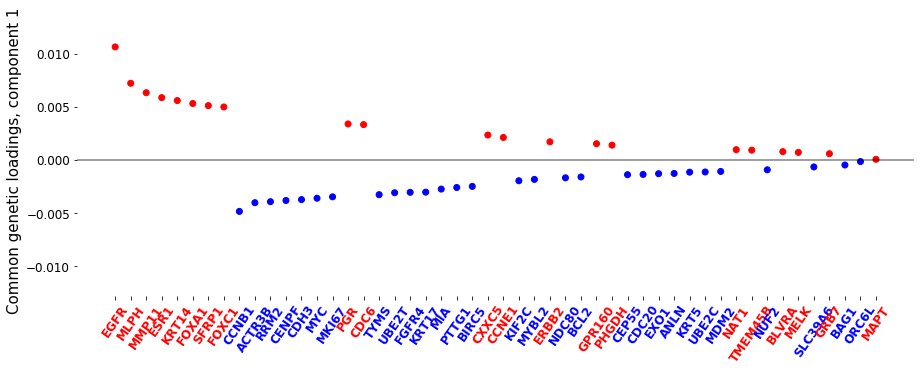

In [7]:
plt.figure(figsize=figsize)
plot_loading(ajive.blocks['genes'].common_loadings_.iloc[:, 0], vert=False)
plt.ylabel('Common genetic loadings, component 1')
savefig(os.path.join(fig_save_dir, 'common_loadings_comp_1'))

Text(0.5, 0, 'Common genetic loadings, component 2')

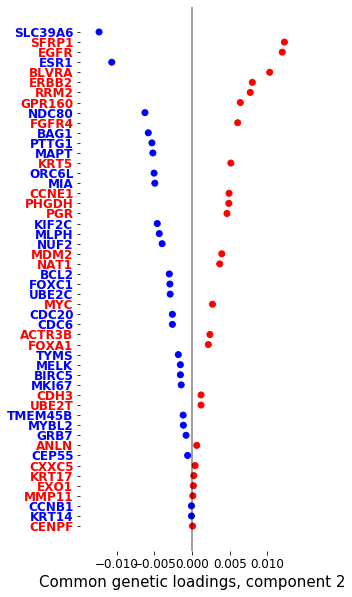

In [8]:
plt.figure(figsize=(4, 10))
plot_loading(ajive.blocks['genes'].common_loadings_.iloc[:, 1], vert=True)
plt.xlabel('Common genetic loadings, component 2')

/Users/iaincarmichael/anaconda3/envs/bcia/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  


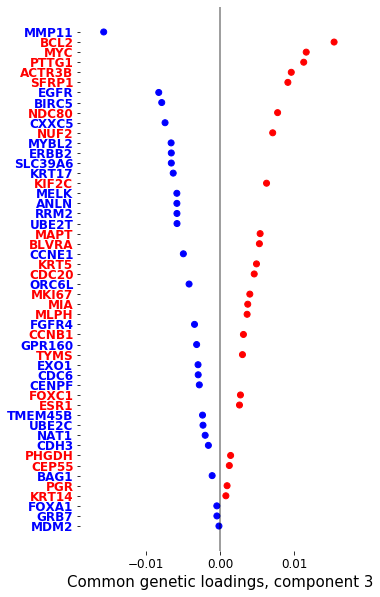

In [9]:
plt.figure(figsize=(5, 10))
plot_loading(ajive.blocks['genes'].common_loadings_.iloc[:, 2], vert=True)
plt.xlabel('Common genetic loadings, component 3')
savefig(os.path.join(fig_save_dir, 'common_loadings_comp_3'))

/Users/iaincarmichael/anaconda3/envs/bcia/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  


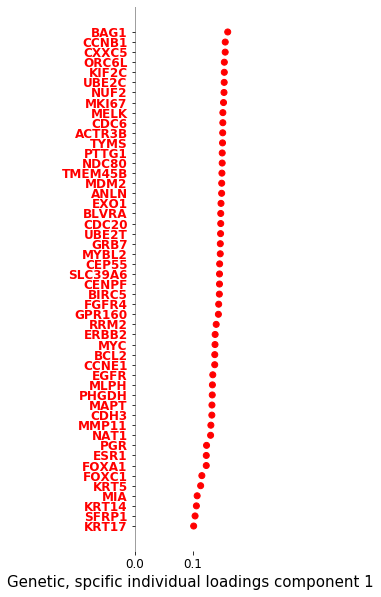

In [10]:
# plt.figure(figsize=figsize)
plt.figure(figsize=(2, 10))
plot_loading(ajive.blocks['genes'].individual.loadings_.iloc[:, 0], vert=True)
plt.xlabel('Genetic, spcific individual loadings component 1')
savefig(os.path.join(fig_save_dir, 'gene_indiv_loadings_comp_1'))

/Users/iaincarmichael/anaconda3/envs/bcia/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  


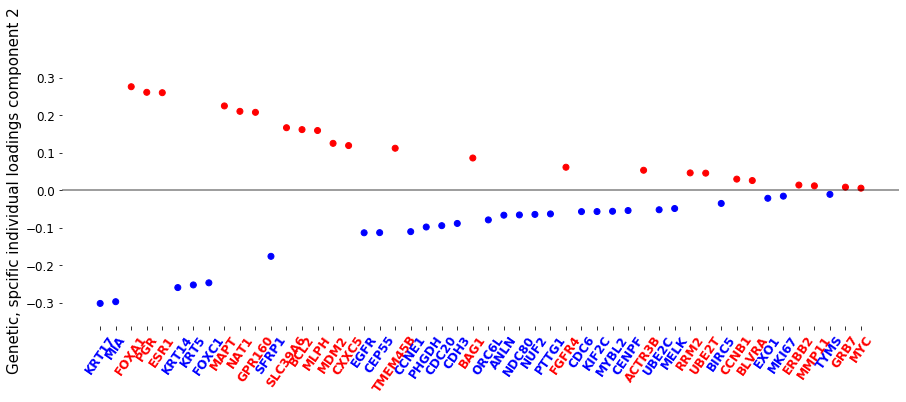

In [11]:
plt.figure(figsize=figsize)
plot_loading(ajive.blocks['genes'].individual.loadings_.iloc[:, 1], vert=False)
plt.ylabel('Genetic, spcific individual loadings component 2')
savefig(os.path.join(fig_save_dir, 'gene_indiv_loadings_comp_2'))

# metadata comparisons

In [12]:
figsize = (9, 9)
dpi = 300

/Users/iaincarmichael/anaconda3/envs/bcia/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  


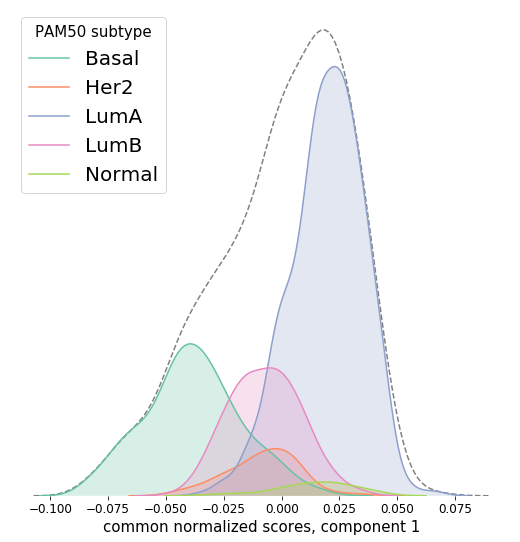

In [13]:
plt.figure(figsize=figsize)
common_scd.comparisons_.loc['common_1', 'pam50_type'].plot_kws = {'points': None}
common_scd.comparisons_.loc['common_1', 'pam50_type'].plot(verbosity=0)
plt.xlabel('common normalized scores, component 1')
plt.yticks([])
plt.legend().set_title('PAM50 subtype')
savefig(os.path.join(fig_save_dir, 'common_1_scores_v_pam50.png'), dpi=dpi)

/Users/iaincarmichael/anaconda3/envs/bcia/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  


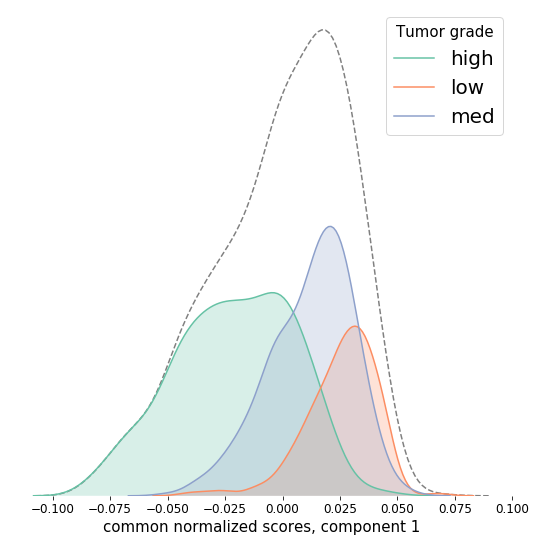

In [14]:
plt.figure(figsize=figsize)
common_scd.comparisons_.loc['common_1', 'cgrade'].plot_kws = {'points': None}
common_scd.comparisons_.loc['common_1', 'cgrade'].plot(verbosity=0)
plt.yticks([])
plt.xlabel('common normalized scores, component 1')

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,2,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
plt.legend().set_title('Tumor grade')

savefig(os.path.join(fig_save_dir, 'common_1_scores_v_grade.png'), dpi=dpi)

/Users/iaincarmichael/anaconda3/envs/bcia/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  


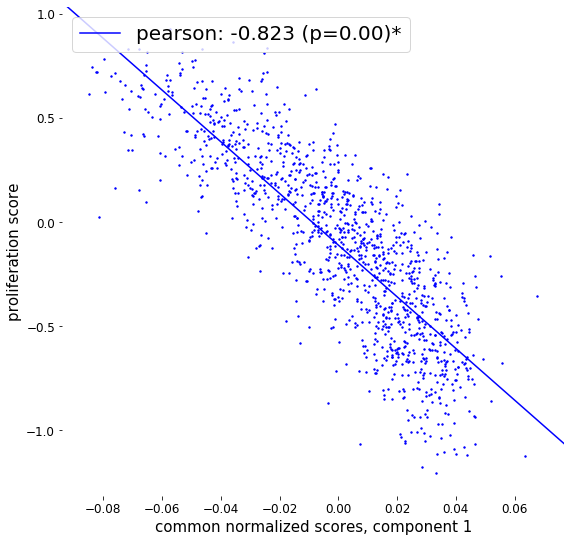

In [15]:
plt.figure(figsize=figsize)
common_scd.comparisons_.loc['common_1', 'cgrade'].plot_kws = {'points': None}
common_scd.comparisons_.loc['common_1', 'proliferation_score'].plot()
plt.xlabel('common normalized scores, component 1')
plt.ylabel('proliferation score')
savefig(os.path.join(fig_save_dir, 'common_1_scores_v_proliferation.png'), dpi=dpi)

/Users/iaincarmichael/anaconda3/envs/bcia/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  


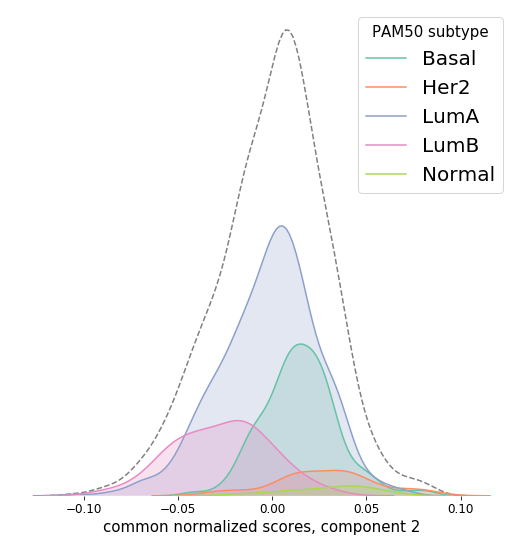

In [20]:
plt.figure(figsize=figsize)
common_scd.comparisons_.loc['common_2', 'pam50_type'].plot_kws = {'points': None}
common_scd.comparisons_.loc['common_2', 'pam50_type'].plot(verbosity=0)
plt.yticks([])
plt.xlabel('common normalized scores, component 2')
plt.legend().set_title('PAM50 subtype')
savefig(os.path.join(fig_save_dir, 'common_2_scores_v_pam50.png'), dpi=dpi)

/Users/iaincarmichael/anaconda3/envs/bcia/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  


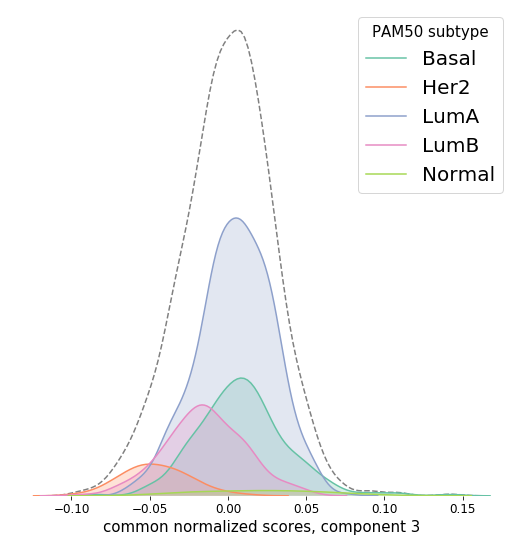

In [19]:
plt.figure(figsize=figsize)
common_scd.comparisons_.loc['common_3', 'pam50_type'].plot_kws = {'points': None}
common_scd.comparisons_.loc['common_3', 'pam50_type'].plot(verbosity=0)
plt.yticks([])
plt.xlabel('common normalized scores, component 3')
plt.legend().set_title('PAM50 subtype')

savefig(os.path.join(fig_save_dir, 'common_3_scores_v_pam50.png'), dpi=dpi)


# loadings vs. md direction

In [29]:
load_vec = ajive.blocks['genes'].individual.loadings_.iloc[:, 1]
pam50_subtypes = np.array(clinical_data['pam50_type'].values)

pair = ('Normal', 'LumA')
comp_name = 'GI2'
mask0 = pam50_subtypes == pair[0]
mask1 = pam50_subtypes == pair[1]
centroid0 = genes.loc[mask0, :].mean()
centroid1 = genes.loc[mask1, :].mean()
diff = centroid0 - centroid1

plt.figure(figsize=[8, 8])
plt.scatter(diff, load_vec)
# plt.xlabel(' md direction'.format(pair[0], pair[1]))
plt.xlabel('Normal - Luminal A mean difference direction'.format(pair[0], pair[1]))
plt.ylabel('Genetic individual component 2 loadings vector')

plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)

# for i, gene in enumerate(load_vec.index):
#     plt.annotate(gene, (diff[i], load_vec[i]), fontsize=10, alpha=1)

texts = [plt.text(diff[i], load_vec[i], gene,
                  ha='center', va='center', fontsize=12)
         for i, gene in enumerate(load_vec.index)]
adjust_text(texts,
            arrowprops=dict(arrowstyle='->', color='red'))


corr, pval = pearsonr(diff, load_vec)

corr_str = 'corr = {:1.3f}, pval = {:1.3f}'.format(corr, pval)

# plt.title('{} vs. {}-{} \n {}'.format(comp_name, pair[0], pair[1], corr_str))

plt.title('{}'.format(corr_str))


savefig(os.path.join(fig_save_dir, 'gene_indiv_2_load_vs_normal-lumA_md.png'), dpi=dpi)

/Users/iaincarmichael/anaconda3/envs/bcia/lib/python3.6/site-packages/cbcs_joint/viz_utils.py:9: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  plt.savefig(fpath, bbox_inches='tight', frameon=False, dpi=dpi)


# additional figures

In [66]:
ajive.common.plot_scores(n_components=3, classes=clinical_data['pam50_type'],
                         scatter_kws={'s': 2})

savefig(os.path.join(fig_save_dir, 'scores_plot_common_vs_pam50.png'), dpi=dpi)

In [67]:
ajive.blocks['genes'].individual.plot_scores(n_components=3, classes=clinical_data['pam50_type'],
                                             scatter_kws={'s': 2})

savefig(os.path.join(fig_save_dir, 'scores_plot_gene_indiv_vs_pam50.png'), dpi=dpi)

In [68]:
ajive.blocks['images'].individual.plot_scores(n_components=3, classes=clinical_data['pam50_type'],
                                             scatter_kws={'s': 2})

savefig(os.path.join(fig_save_dir, 'scores_plot_image_indiv_vs_pam50.png'), dpi=dpi)

In [70]:
ajive.common.svals_

common_1    1.333364
common_2    1.266688
common_3    1.252904
common_4    1.232843
common_5    1.218219
common_6    1.198208
common_7    1.193168
dtype: float64